<a href="https://colab.research.google.com/github/TheRyanBra/TheRyanBra.github.io/blob/main/Pokemon_Scarlet_and_Violet_Egg_Rate_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Pokemon Scarlet and Violet Egg Rate Calculator
# @markdown I spent a crazy amount of time for what this is. Basically I was curious how long would be the optimal time to wait to get all 10 eggs since there is no indicator of when you get an egg this gen. From that, this was born. I went overboard and made it interactive so that you can put in pretty much any combo of parameters.
# @markdown
# @markdown Some fields you need to push the play button to the left and some update automatically. However they only update automatically when you change something. So if you change something farther up but not something below, press the play button for each cell.
import numpy as np
import pylab as p
import math as m

#This is the Binomial Distribution
def Egg(p,k,n):
  coeff = (m.factorial(n))/((m.factorial(k))*(m.factorial(n-k)))
  return coeff*(p**k)*((1-p)**(n-k))

#This is the Cumulative Distribution Function
def AtLeast(p,k,n):
  prob = 1
  for i in range(k):
    prob = prob - Egg(p,i,n)
  return prob

In [ ]:
# @title Parameters { run: "auto", vertical-output: true }
# @markdown Select whether the Pokemon species are different or the same
Species = "Same" # @param ["Different", "Same"]
# @markdown Select whether the Original Trainer names are different or the same
OT = "Same" # @param ["Same", "Different"]
# @markdown Select what level of Egg Power you have. None is 0.
EggPower = "1" # @param ["0", "1", "2", "3"]
# @markdown Select your desired number of eggs. For example, select 5 if you want to know the probability of getting 5 eggs after some time.
Eggs = 1 # @param {type:"slider", min:1, max:10, step:1}
Eggs = int(Eggs)

#These are all possible probability of producing an egg. Annoyingly, without Egg Power you have to wait 60 seconds to see if an egg is generated, but if you do have it then it's 10 seconds. All of these probabilities have been taken from Serebii. https://www.serebii.net/scarletviolet/breeding.shtml
ChanceArr = np.array([[0.03,0.15,0.21,0.3],[0.06,0.3,0.42,0.6],[0.08,0.4,0.56,0.8]])

#This is making a way to detect which list to pull from. Assigning 0 to Different and 1 to Same could work but I decided to just do an if statement so there is no way of messing it up.
if Species == "Different" and OT == "Same":
  Siti = 0
elif Species == "Same" and OT == "Different":
  Siti = 2
else:
  Siti = 1

#Combining the index generated above and the Egg Power level determines the probability of an egg being created. Again, I could make make the options more intuitive by making them strings and then decoding the string into an integer but making it go from 0 to 3 is much simpler.
Chance = ChanceArr[Siti][int(EggPower)]

#I thought I would need this later but ended up not using it. I decided to just use it anyways in the string below instead of rewriting it.
if int(EggPower) == 0:
  Interval = 60
else:
  Interval = 10

#Output
print("You have a chance to generate an egg every " + str(Interval) + " seconds.")
print("Your chance of generating an egg is " + str(int(Chance*100)) + "%.")

You have a chance to generate an egg every 10 seconds.
Your chance of generating an egg is 30%.


In [ ]:
# @title Egg Probability Calculator { run: "auto", vertical-output: true }
# @markdown Select how long you want to know the probability of getting your specified amount of eggs in.
# @markdown
# @markdown Keep in mind that if your interval to generate eggs is 60 seconds, enter your time in minutes and make sure seconds are 0. If the interval is 10 seconds, make sure the seconds are divisible by 10.
Minutes = 5 # @param {type:"number"}
Seconds = 0 # @param {type:"number"}
#Because I set the code to auto execture it kept throwing errors when a field was not a number ie None. This little bit stops it from updating until both fields have something filled in.
#I'm actually proud I thought of having two separate fields for minutes and seconds because before I was just dealing in seconds and it make things much more complicated for the user.
if Minutes != None and Seconds != None:
  Time = int((Minutes * 60) + Seconds)

#I tried to anticipate common errors and wrote some logic to throw an error message when encountered.
if Time < 0:
  print("Don't do that. No negative numbers.")
elif int(EggPower) == 0 and Time > 86400:
  print("Number is too big, you will likely have all 10 eggs by a whole day, please don't wait a full 24 hours. You don't need to wait that long.")
elif int(EggPower) == 0 and Minutes < Eggs:
  print("My code doesn't like when the time is lower than number of eggs. It doesn't make sense anyways because if you can only generate an egg every minute then there is a 0% chance of generating an egg in 1 minute. Please try again.")
elif int(EggPower) != 0 and Time > 3850:
  print("Number is too big, you will likely have all 10 eggs by an hour. You don't need to wait that long.")
elif int(EggPower) != 0 and int(Time/10) < Eggs:
  print("My code doesn't like when the time is lower than number of eggs. It doesn't make sense anyways because if you can only generate an egg every 10 seconds then there is a 0% chance of generating an egg in 10 seconds. Please try again.")
elif int(EggPower) != 0:
  Time = int(Time/10)
  Probability = AtLeast(Chance,Eggs,Time)
  print("Your probability of finding " + str(Eggs) + " egg(s) in your specified amount of time is: " + str(round(Probability*100,2)) + "%.")
elif int(EggPower) == 0:
  Probability = AtLeast(Chance,Eggs,Minutes)
  print("Your probability of finding " + str(Eggs) + " egg(s) in your specified amount of time is: " + str(round(Probability*100,2)) + "%.")

Your probability of finding 10 egg(s) in your specified amount of time is: 99.91%.


The optimal time where you have a 80.0% chance of having 1 egg(s) is 53 minutes.
You have a 80.0978% chance.


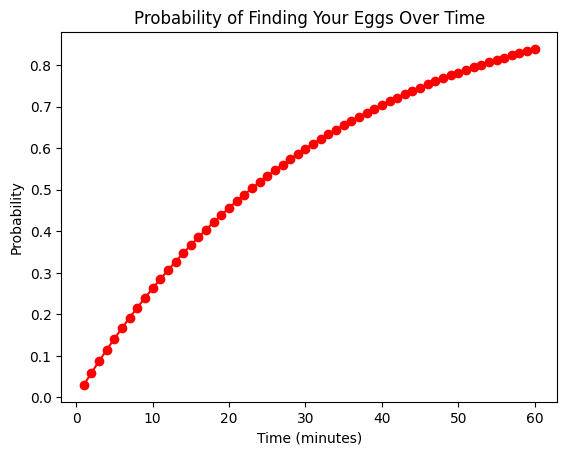

In [ ]:
# @title Optimal Time { run: "auto" }
# @markdown Enter what probability you consider optimal as a percentage. In other words, what percent confidence do you want to have so that you will get all your specified amount of eggs.
OptPercent = 80 # @param {type:"slider", min:1, max:99, step:1}
OptPercent = OptPercent/100

#This is a bit sloppy. I had trouble with the huge range in time it takes to make eggs between no Egg Power and having it. So I ended up editing this whole block to run in a while loop until the where function could find the percentage specified.
def OptTimeCalc(Factor):
  TLower = Eggs
  #I decided 10 minutes or 60 seconds were reasonable times for finding a single egg in each case. This scales with how many eggs are expected and how many times the while loop has run.
  #Assigning one step to be one minute for no Egg Powers means I just need to multiply by 10. While having Egg Powers means I need to multiply by 6 for 60 seconds.
  TUpperS = (Eggs * 10 * Factor) + 1
  TUpperF = (Eggs * 6 * Factor) + 1

  #Creating an array of times.
  if int(EggPower) == 0:
    TimeArr = np.array(range(TLower,TUpperS))
    labelx = " (minutes)"
  elif int(EggPower) != 0:
    TimeArr = np.array(range(TLower,TUpperF))
    labelx = " (seconds)"

  #Calculating the probability array
  ProbArr = np.zeros(len(TimeArr))
  for i in range(len(TimeArr)):
    ProbArr[i] = AtLeast(Chance,Eggs,TimeArr[i])

  #This is finding the optimal time
  #I had a lot of trouble with the condition for finding where the percentage specified first occurs. It turned out I made a mistake and was thinking about it incorrectly. I thought I needed the difference to be less than my desired level of precision but in this case I need it to be 0 or less.
  #It's funny but the odd shape of the array where generates actually helps extremely for this entire block of code. If it can't find a value in the array that meets the condition it's empty and specifying the index ([0][0]) throw an error. Throwing this error was very annoying but then I realized I could take advantage of it to iterate in a loop until it could find the desired percent.
  OptCond = ((OptPercent - ProbArr) <= 0)
  OptTimei = np.where(OptCond)[0][0]
  OptTime = TimeArr[OptTimei]
  #This is the really sloppy part I'm not proud of. Since I didn't originally write this to be a definiton I end up having to output all this stuff I wasn't intending to have to do.
  return OptTimei, OptTime, TimeArr, ProbArr, labelx

#This is the while loop that runs until the specified percentage can be found. I start the loop at 1 so that when it's passed into the function I don't get an upper bound on time that is 0.
#This is actually my first time using and learning about the try and except functions. It's real handy here.
LoopStarter = 1
while LoopStarter < 100:
  try:
     OTi, OptT, TArr, PArr, Unit = OptTimeCalc(LoopStarter)
     break
  except:
    LoopStarter = LoopStarter + 1

#Plotting (Yes, I did spend the time to make sure I'm using the correct units and labeling the graph. My physics degree hammered it into my soul.)
#This is part of what I'm talking about it being sloppy, I really didn't need to pass the unit out of the function but didn't want to rewrite stuff too much.
fig,ax = p.subplots(1,1)
ax.set_title("Probability of Finding Your Eggs Over Time")
ax.set_xlabel("Time" + Unit)
ax.set_ylabel("Probability")
if int(EggPower) == 0:
  p.plot(TArr,PArr,'ro-')
elif int(EggPower) != 0:
  p.plot(TArr*10,PArr,'ro-')

#Finally outputting the calculations
#Again kind of sloppy because I had to rename my variables since they don't get passed out of the function unless you do it yourself.
if int(EggPower) == 0:
  print("The optimal time where you have a " + str(OptPercent*100) + "% chance of having " + str(Eggs) + " egg(s) is " + str(OptT) + " minutes.")
  print("You have a " + str(round((PArr[OTi] * 100),4)) + "% chance.")
elif int(EggPower) != 0:
  #Keeping in mind the interval is 10 seconds, instead of multiplying by 10 to get seconds and dividing by 60 to get minutes, just divide by 6.
  OptT = OptT/6
  OptTimeM = int(OptT)
  OptTimeS = int(((OptT - OptTimeM) * 60))
  #I was having issues where rounding gave me stuff like 29 seconds instead of 30 seconds. Since I've been hounding on the fact the interval is 10 seconds I had to fix this.
  if OptTimeS % 10 > 0:
    OptTimeS = OptTimeS + 1
  print("The optimal time where you have a " + str(OptPercent*100) + "% chance of having " + str(Eggs) + " egg(s) is " +  str(OptTimeM) + " minutes and " + str(OptTimeS) + " seconds.")
  print("You have a " + str(round((PArr[OTi] * 100),4)) + "% chance.")

# Conclusion
It really seems like GameFreak wanted an egg appearing to be a very rare occurence unless you have Egg Power. It's insane to me that it takes so long to basically guarantee getting an egg unless you're using Egg Power. As annoying as it is, it somewhat makes sense because if it wasn't a drastic difference you may not get 10 eggs before the 30 minutes for sandwich effects run out. But with having to wait almost an hour just to have an 80% chance of making an egg in the worst conditions is a little bit crazy. Who is going to be sitting in a picnic for an hour? Who would do that just for a decent chance to get 1 egg?

From my point of view, I think most people agree it's a waste to use Egg Power Lvl. 3. I think this calculator helps prove it. What has a much bigger effect is the combination of species and OT. At the very least, it has a noticible effect without having to spend Herba Mystica. I know this is not reasonable for everyone, but if I was going to be doing a lot of breeding, I'd much rather start another game in a different language on a different Switch profile then breed a few eggs to get one that is differnt trainer and language. You can get strawberries and jam to make an Egg Power Lvl. 1 sandwich without any gym badges. Then you can just transfer it back to your main game with Pokemon Home. Then bam, you've shaved off almost 2 minutes per batch at Egg Power 2 trying to get all 10 eggs. Maybe if you want to make just an absolute absurd amount of eggs and hatch them all at once you could have same species, different trainers and Lvl. 3 Egg Power and just try and crack out 300 eggs at once. But again, that's at the cost of Herba Mystica.

Why did I spend so much time doing this? I have no clue. It's real silly but hey, I had fun and found it interesting. Which speaking of, I did minimal testing and mainly just fixed things that I noticed or bugged me. I feel I've reached a state where I'm done with it but if anybody notices any bugs let me know.

I just had a very cursed thought... Technically this whole thing could be used to calculate the odds of you finding a shiny over a certain number of eggs. Of course, for each individual egg your chances are no better, but it's the same with this. Just because you waited for an hour, it doesn't change the fact the chance to generate an egg the next time is anywhere from 3%-80%. But there's no denying it'd be strange to have max odds and not find a single egg after 30 minutes. So if anybody wants me to create a tool to validate their rage at not getting a shiny from an egg let me know. I may do it anyways.